# Question 1

## a)
To obtain the samples based on these matrices, we can use Matplotlib's mlab functions. First, we need to import the required libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplab
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd

# plt.style.use('fivethirtyeight')
sns.set_style("darkgrid")
# sns.set_palette("bright")
sns.set_context("talk")
# plt.style.use('dark_background')
# mplab.rcParams['figure.figsize'] = [20.0, 10.0]

Afterwards, Numpy's standard_normal and Choelsky functions can be used to create a normal distribution and then transform it according to the A matrix and the B matrix covariance.

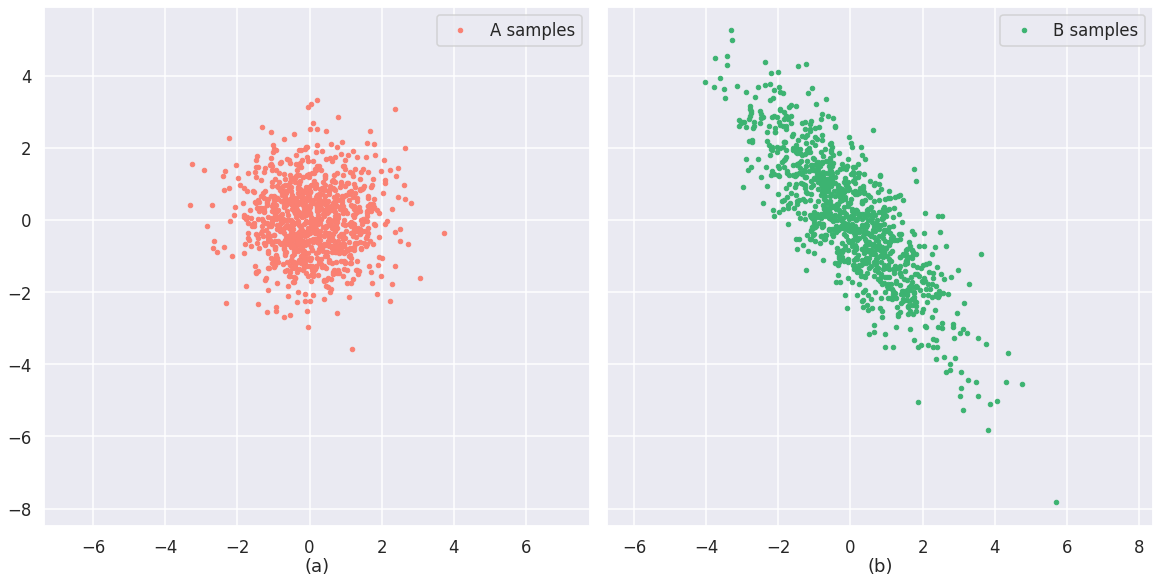

In [ ]:
# First approach for the datapoints, based on: https://stackoverflow.com/questions/14920272/generate-a-data-set-consisting-of-n-100-2-dimensional-samples
mean = (0, 0)
covA = [[1, 0], [0, 1]]

# Select the numebr of samples
sample_number = 1000

# Create the uncorrelated datapoints
uncorr_datapoints = np.random.standard_normal((2, sample_number))

# Modify the datapoints to make them correlated
L = np.linalg.cholesky(covA)
A_matrix_samples = np.dot(L, uncorr_datapoints) + np.array(mean).reshape(2, 1)

# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True,
                       constrained_layout = True, figsize = [16.0, 8.0],
                       subplot_kw = {'aspect': 'equal'})
ax[0].plot(A_matrix_samples[0], A_matrix_samples[1], '.', color = 'salmon',
           label = "A samples")
ax[0].axis('equal')
ax[0].legend()
ax[0].set_title('(a)', y = -0.1)

# Creation of the B matrix
covB = [[2, -2], [-2, 3]]

# Create the uncorrelated datapoints
uncorr_datapoints = np.random.standard_normal((2, sample_number))

# Modify the datapoints to make them correlated
L = np.linalg.cholesky(covB)
B_matrix_samples = np.dot(L, uncorr_datapoints) + np.array(mean).reshape(2, 1)

# Plot the results
ax[1].plot(B_matrix_samples[0], B_matrix_samples[1], '.', color = 'mediumseagreen',
           label = "B samples")
ax[1].axis('equal')
ax[1].legend()
ax[1].set_title('(b)', y = -0.1)
plt.show()

Another technique is to use Numpy's random.multivariate function directly, as such:

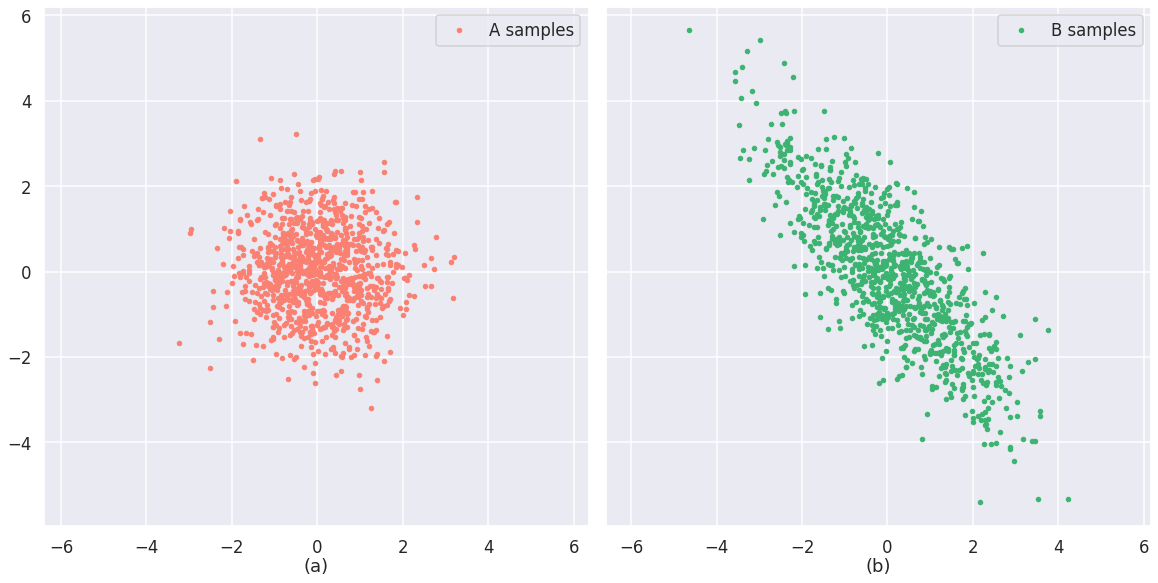

In [ ]:
# Based on https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html
mean = (0, 0)
covA = [[1, 0], [0, 1]]
# Create the A matrix samples
A_matrix_samples = np.random.multivariate_normal(mean, covA, 1000).T
covB = [[2, -2], [-2, 3]]
# Create the B matrix samples
B_matrix_samples = np.random.multivariate_normal(mean, covB, 1000).T

# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True,
                       constrained_layout = True, figsize = [16.0, 8.0],
                       subplot_kw = {'aspect': 'equal'})
ax[0].plot(A_matrix_samples[0], A_matrix_samples[1], '.', color = 'salmon',
           label = "A samples")
ax[0].axis('equal')
ax[0].legend()
ax[0].set_title('(a)', y = -0.1)

ax[1].plot(B_matrix_samples[0], B_matrix_samples[1], '.', color = 'mediumseagreen',
           label = "B samples")
ax[1].axis('equal')
ax[1].legend()
ax[1].set_title('(b)', y = -0.1)
plt.show()

## b)

### Without Whitening
First, it is considered pertinent to create a helper function that allows for an easier calculation of the covariance matrix of the samples:

In [ ]:
#Based on https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/
def obtainCovariance(mat):
    mean = np.mean(mat, axis = 1)
    sample_size = mat.shape[1]
    mat = (mat.T - mean).T
    covariance_matrix = mat.dot(mat.T) / sample_size
    return covariance_matrix

With this, it is possible to calculate the contour ellipse for the samples:

In [ ]:
from numpy import linalg as LA #Import numpy's linear algebra functions
from matplotlib.patches import Ellipse
def createEllipse(sampleMat = None, meanMat = None, covMat = None, std = 1,
                  facecolor = "none", edgecolor = "lightgreen", lw = 2):
  
  if meanMat is None:
    meanMat = np.mean(sampleMat, axis = 1)
  if covMat is None:
    covMat = obtainCovariance(sampleMat)
  
  eigenVals, eigenVecs = LA.eigh(covMat)
  ell_width = 2 * std * np.sqrt(eigenVals[1])
  ell_height = 2 * std * np.sqrt(eigenVals[0])
  ell_angle = np.arctan2(eigenVecs[1][1],eigenVecs[0][1])*180/np.pi
  ellipse = Ellipse(xy = (meanMat[0], meanMat[1]), width = ell_width,
                    height = ell_height, angle = ell_angle,
                    facecolor = facecolor, edgecolor = edgecolor, lw = lw,
                    zorder = 5)
  return ellipse

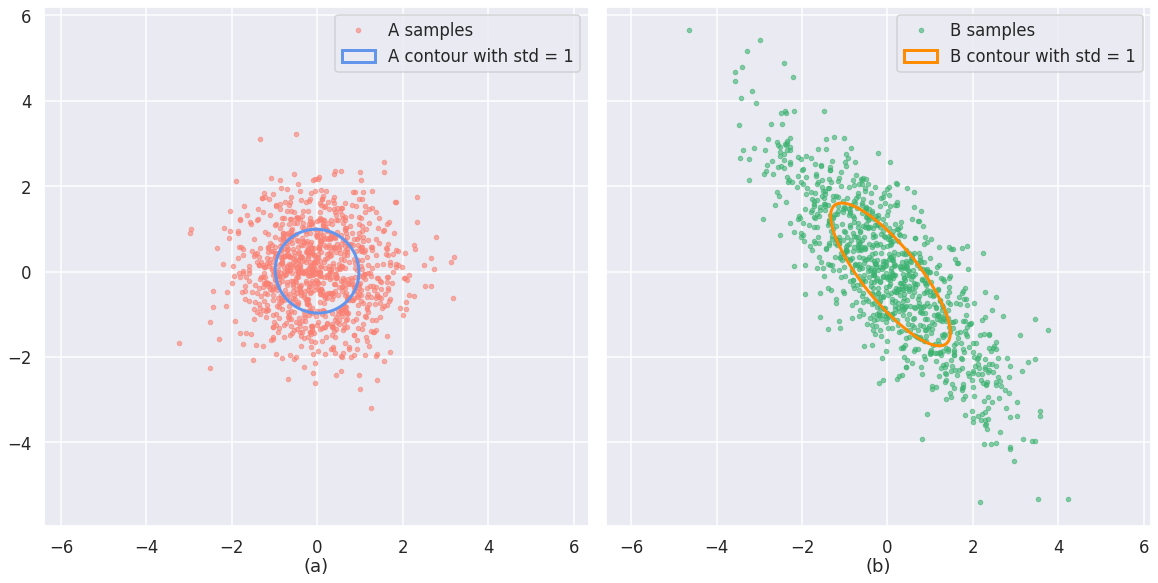

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       constrained_layout = True, figsize = [16.0, 8.0],
                       subplot_kw = {'aspect': 'equal'})
ax[0].plot(A_matrix_samples[0], A_matrix_samples[1], '.', color = 'salmon',
           alpha = 0.6, label = "A samples")
ax[0].axis('equal')
ellipse = createEllipse(A_matrix_samples)
ax[0].add_patch(ellipse)
ellipse.set(clip_box=ax[0].bbox, edgecolor = "cornflowerblue", lw = 3,
          label = "A contour with std = 1")
ax[0].legend()
ax[0].set_title('(a)', y = -0.1)

ax[1].plot(B_matrix_samples[0], B_matrix_samples[1], '.', color = 'mediumseagreen',
           alpha = 0.6, label = "B samples")
ax[1].axis('equal')
ellipse = createEllipse(B_matrix_samples)
ax[1].add_patch(ellipse)
ellipse.set(clip_box=ax[1].bbox, edgecolor = "darkorange", lw = 3,
          label = "B contour with std = 1")
ax[1].legend()
ax[1].set_title('(b)', y = -0.1)
plt.show()

### With Whitening
Whitening can also be used to create the contour. For this, it is easier to create a function that will help in the whitening process:

In [ ]:
def matWhitening(samplesMat):
  #First, we need to calculate the mean and subtract it from the samples
  sample_mean = np.mean(samplesMat, axis = 1)
  samplesMat = (samplesMat.T - sample_mean).T
  #We then proceed to calculate the covariance matrix
  cov_mat = obtainCovariance(samplesMat)
  #Afterwards, we need the eigenvalues and eigenvectors
  eigenVals, eigenVecs = LA.eigh(cov_mat)
  # We now need to calculate the whitening of the matrix
  # The following is based on: https://cbrnr.github.io/2018/12/17/whitening-pca-zca/
  # Basically, we create a diagonal formed by one over the square root of the eigenvalues,
  #  afterwards, they are multiplied (@ is the dot product) with the transpose of the eigenvectors
  #  and then that result again multiplied with the transpose of the samples.
  z_mat = np.diag(eigenVals**(-1/2)) @ eigenVecs.T @ samplesMat # @ is matrix multiplication
  return z_mat

With this function now defined, it is possible to apply the whitening and thus obtain the contour of the A and B sample matrices.

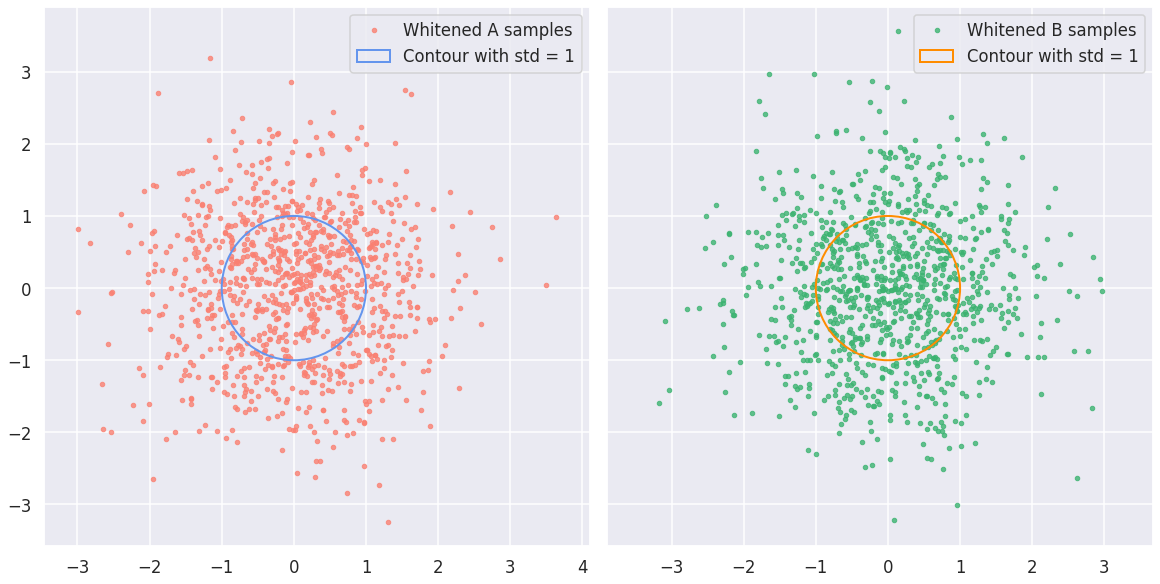

In [ ]:
std_val = 1 # Define the number of standard deviations for the countour
fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       constrained_layout = True, figsize = [16.0, 8.0],
                       subplot_kw = {'aspect': 'equal'})
A_whitened = matWhitening(A_matrix_samples)
ax[0].plot(A_whitened[0], A_whitened[1], '.', color = 'salmon', alpha = 0.8,
           label = "Whitened A samples")
ax[0].axis('equal')
from matplotlib.patches import Circle
circle = Circle((0, 0), std_val, edgecolor = 'cornflowerblue', facecolor = "none", 
                zorder = 5, ls = '-', lw = 2, label = "Contour with std = 1")
ax[0].add_patch(circle)
ax[0].legend()
# plt.show()

# fig, ax = plt.subplots(figsize = [12.0, 8.0], subplot_kw={'aspect': 'equal'})
# plt.plot(B_matrix_samples[:,0], B_matrix_samples[:,1], '.', alpha=0.7, label = "Unmodified samples")
B_whitened = matWhitening(B_matrix_samples)
ax[1].plot(B_whitened[0], B_whitened[1], '.', color= 'mediumseagreen', alpha = 0.8,
           label = "Whitened B samples")
ax[1].axis('equal')
from matplotlib.patches import Circle
circle = Circle((0, 0), std_val, edgecolor='darkorange', facecolor="none", 
                zorder = 5, ls = '-', lw = 2, label = "Contour with std = 1")
ax[1].add_patch(circle)
ax[1].legend()
plt.show()

## c)
For this question, the previously created obtainCovariance helper function can be used:

In [ ]:
obtainCovariance(A_matrix_samples)

array([[ 0.95933347, -0.02399463],
       [-0.02399463,  0.96266599]])

Now for the B_matrix samples:

In [ ]:
obtainCovariance(B_matrix_samples)

array([[ 1.96121399, -1.91023589],
       [-1.91023589,  2.79492543]])

Comparing the matrices found in c) with the ones defined in a), it can be seen that although they are similar they are not exactly the same. The reason for their difference is due to the fact that the one found in c) is based on a sample of the whole population, while the one in a) is based on the entire population. They would indeed be equal if the sample would be the entire population.

What this all mean is that the more values we sample from the entire population for our statistical calculations, the more the information obtained from them will approach the real values of the population we are sampling from.

# Question 2

First, it is best to define the probabilities, means and covariances of each class.

In [ ]:
P1 = 0.2
mean1 = np.array([3, 2]).T
cov1 = [[1, -1], [-1, 2]]

P2 = 0.7
mean2 = np.array([5, 4]).T
cov2 = [[1, -1], [-1, 2]]

P3 = 0.1
mean3 = np.array([2, 5]).T
cov3 = [[0.5, 0.5], [0.5, 3]]

## a)

For the first part of the question, a pair of  functions that allow for the calculation of the results will be built

In [ ]:
# Create the discriminant function
# Based on http://www.nada.kth.se/~stefanc/DATORSEENDE_AK/l5.pdf
def discriminant(val, meanMat, covMat, prob, ML = False):
  if ML == True:
    prob = 1/3
  val = np.array(val)
  inverse_covMat = np.linalg.inv(covMat)
  W_i = -0.5 * inverse_covMat
  w_i = inverse_covMat @ meanMat
  w_i_0 = -0.5 * meanMat.T @ inverse_covMat @ meanMat - 0.5 * np.log(np.linalg.det(covMat)) + np.log(prob)
  result = val.T @ W_i @ val + w_i.T @ val + w_i_0
  return result

# Create the prediction function
def predict(value1, value2, ML = False):
  discriminant1 = discriminant([value1, value2], mean1, cov1, P1, ML)
  discriminant2 = discriminant([value1, value2], mean2, cov2, P2, ML)
  discriminant3 = discriminant([value1, value2], mean3, cov3, P3, ML)

  if (discriminant1 >= discriminant2) and (discriminant1 >= discriminant3):
    classification = 1
  elif (discriminant2 >= discriminant1) and (discriminant2 >= discriminant3):
    classification = 2
  elif (discriminant3 >= discriminant2) and (discriminant3 >= discriminant1):
    classification = 3
  return classification

Afterwards, 

In [ ]:
# Based on https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Create the grid
x_min, x_max = -15, 15.01
y_min, y_max = -15, 15.01
# Select the step size for the mesh
h = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]

# Create the prediction for each coordinate in the grid
predictGridMAP = np.zeros((Z.shape[0], 1))
predictGridML = np.zeros((Z.shape[0], 1))
for i in range(Z.shape[0]):
  predictGridMAP[i] = predict(Z[i,0], Z[i,1])
  predictGridML[i] = predict(Z[i,0], Z[i,1], ML = True)

# Reshape it
predictGridMAP = predictGridMAP.reshape(xx.shape)
predictGridML = predictGridML.reshape(xx.shape)

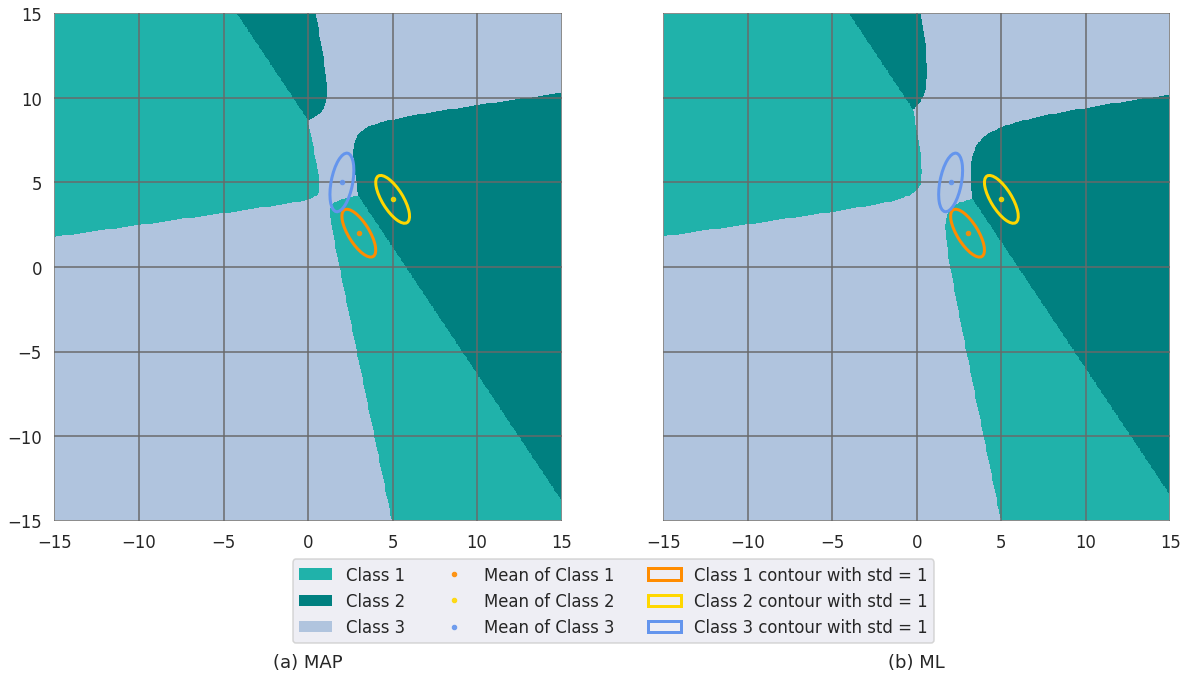

In [ ]:
# Import some elements needed for the plotting
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

# Create the color map
heatmap_colors = ["lightseagreen", "teal", "lightsteelblue"]
cmap_jm = ListedColormap(heatmap_colors)

# Plot the meshgrids
plt.rcParams["axes.axisbelow"] = False
fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       figsize = [20.0, 15.0], subplot_kw = {'aspect': 'equal'})
ax[0].pcolormesh(xx, yy, predictGridMAP, cmap = cmap_jm)

# Plot the means
ax[0].plot(mean1[0], mean1[1], '.', color = 'darkorange',
           alpha = 0.9, label = "Mean of Class 1", zorder = 10)
ax[0].plot(mean2[0], mean2[1], '.', color = 'gold',
           alpha = 0.9, label = "Mean of Class 2", zorder = 10)
ax[0].plot(mean3[0], mean3[1], '.', color = 'cornflowerblue',
           alpha = 0.9, label = "Mean of Class 3", zorder = 10)

# Plot the ellipses
ellipse1 = createEllipse(meanMat = mean1, covMat = cov1)
ax[0].add_patch(ellipse1)
ellipse1.set(clip_box = ax[0].bbox, edgecolor = "darkorange", lw = 3,
          label = "Class 1 contour with std = 1")
ellipse2 = createEllipse(meanMat = mean2, covMat = cov2)
ax[0].add_patch(ellipse2)
ellipse2.set(clip_box = ax[0].bbox, edgecolor = "gold", lw = 3,
          label = "Class 2 contour with std = 1")
ellipse3 = createEllipse(meanMat = mean3, covMat = cov3)
ax[0].add_patch(ellipse3)
ellipse3.set(clip_box = ax[0].bbox, edgecolor = "cornflowerblue", lw = 3,
          label = "Class 3 contour with std = 1")

# Set the title
ax[0].set_title('(a) MAP', y = -0.3)

# Set the grid
ax[0].grid(True, color = 'dimgray')

# For the ML Plot
# Plot the mesh
ax[1].pcolormesh(xx, yy, predictGridML, cmap = cmap_jm)

#Plot the means
ax[1].plot(mean1[0], mean1[1], '.', color = 'darkorange',
           alpha = 0.9, label = "Mean of Class 1", zorder = 10)
ax[1].plot(mean2[0], mean2[1], '.', color = 'gold',
           alpha = 0.9, label = "Mean of Class 2", zorder = 10)
ax[1].plot(mean3[0], mean3[1], '.', color = 'cornflowerblue',
           alpha = 0.9, label = "Mean of Class 3", zorder = 10)

#Plot the ellipses
ellipse1 = createEllipse(meanMat = mean1, covMat = cov1, edgecolor = "darkorange", lw = 3)
ax[1].add_patch(ellipse1)
ellipse2 = createEllipse(meanMat = mean2, covMat = cov2, edgecolor = "gold", lw = 3)
ax[1].add_patch(ellipse2)
ellipse3 = createEllipse(meanMat = mean3, covMat = cov3, edgecolor = "cornflowerblue", lw = 3)
ax[1].add_patch(ellipse3)

# Define the legend elements
legendHandles, labels = ax[0].get_legend_handles_labels()
legendHandles.insert(0, Patch(facecolor = heatmap_colors[0], edgecolor = 'None',
                     label = "Class 1"))
legendHandles.insert(1, Patch(facecolor = heatmap_colors[1], edgecolor = 'None',
                     label = "Class 2"))
legendHandles.insert(2, Patch(facecolor = heatmap_colors[2], edgecolor = 'None',
                     label = "Class 3"))

# Set the legend
ax[1].legend(handles = legendHandles, ncol = 3, loc = 1, bbox_to_anchor = (0.55, -0.06))

ax[1].set_title('(b) ML', y = -0.3)
ax[1].grid(True, color = 'dimgray')
# fig.legend(handles = legendHandles, loc='lower center',
#            ncol = 3, mode = "expand")
plt.rcParams["axes.axisbelow"] = True
plt.show()

## b)

The same procedure used in question 1. a) can be used for this question, with the addition of a random number generator that will help randomize the number of samples each class gets based on the probability that they have of being from a class

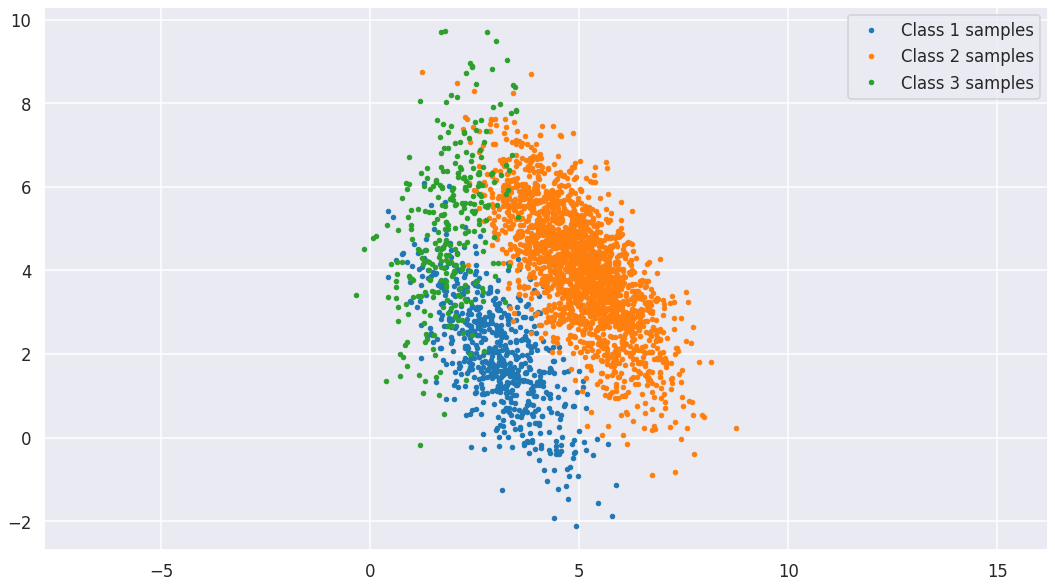

In [ ]:

sample_size = 3000

uncorr_datapoints = np.random.standard_normal((2, sample_size)).T
divider = np.random.uniform(size = 3000).T

totalSamples = np.c_[uncorr_datapoints, divider]
class1 = totalSamples[totalSamples[:, 2] <= 0.2][:,:-1]
class2 = totalSamples[totalSamples[:, 2] > 0.2]
class2 = class2[class2[:, 2] <= 0.9][:,:-1]
class3 = totalSamples[totalSamples[:, 2] > 0.9][:,:-1]

cholesky1 = np.linalg.cholesky(cov1)
cholesky2 = np.linalg.cholesky(cov2)
cholesky3 = np.linalg.cholesky(cov3)

class1 = cholesky1 @ class1.T + np.array(mean1).reshape(2,1)
class2 = cholesky2 @ class2.T + np.array(mean2).reshape(2,1)
class3 = cholesky3 @ class3.T + np.array(mean3).reshape(2,1)

fig, ax = plt.subplots(figsize = [18.0, 10.0], subplot_kw={'aspect': 'equal'})
ax.plot(class1[0], class1[1], '.', label = "Class 1 samples")
ax.plot(class2[0], class2[1], '.', label = "Class 2 samples")
ax.plot(class3[0], class3[1], '.', label = "Class 3 samples")
ax.axis('equal')
ax.legend()
plt.show()


Classifying the dataset using the previously defined prediction functions it is possible to obtain:

In [ ]:
# Let's make sure they are in the correct format
if class1.shape[0] == 2:
  class1 = class1.T
if class2.shape[0] == 2:
  class2 = class2.T
if class3.shape[0] == 2:
  class3 = class3.T

predictGridMAP_C1 = np.zeros((class1.shape[0], 1))
predictGridML_C1 = np.zeros((class1.shape[0], 1))

predictGridMAP_C2 = np.zeros((class2.shape[0], 1))
predictGridML_C2 = np.zeros((class2.shape[0], 1))

predictGridMAP_C3 = np.zeros((class3.shape[0], 1))
predictGridML_C3 = np.zeros((class3.shape[0], 1))

# Now to check the predictions of Class1
for i in range(class1.shape[0]):
  predictGridMAP_C1[i] = predict(class1[i, 0], class1[i, 1])
  predictGridML_C1[i] = predict(class1[i, 0], class1[i, 1], ML = True)

uniqueMAP, countsMAP = np.unique(predictGridMAP_C1, return_counts = True)
uniqueML, countsML = np.unique(predictGridML_C1, return_counts = True)

C1_MAP_classification = dict(zip(uniqueMAP, countsMAP))
C1_ML_classification = dict(zip(uniqueML, countsML))

# Now Class 2
for i in range(class2.shape[0]):
  predictGridMAP_C2[i] = predict(class2[i, 0], class2[i, 1])
  predictGridML_C2[i] = predict(class2[i, 0], class2[i, 1], ML = True)

uniqueMAP, countsMAP = np.unique(predictGridMAP_C2, return_counts = True)
uniqueML, countsML = np.unique(predictGridML_C2, return_counts = True)

C2_MAP_classification = dict(zip(uniqueMAP, countsMAP))
C2_ML_classification = dict(zip(uniqueML, countsML))

# Finally Class 3
for i in range(class3.shape[0]):
  predictGridMAP_C3[i] = predict(class3[i, 0], class3[i, 1])
  predictGridML_C3[i] = predict(class3[i, 0], class3[i, 1], ML = True)

uniqueMAP, countsMAP = np.unique(predictGridMAP_C3, return_counts = True)
uniqueML, countsML = np.unique(predictGridML_C3, return_counts = True)

C3_MAP_classification = dict(zip(uniqueMAP, countsMAP))
C3_ML_classification = dict(zip(uniqueML, countsML))

# Build confusion matrices
# confusionMatrix_MAP = np.zeros((3, 3))
confusionMatrix_MAP = np.c_[list(C1_MAP_classification.values()), list(C2_MAP_classification.values()), list(C3_MAP_classification.values())]
confusionMatrix_ML = np.c_[list(C1_ML_classification.values()), list(C2_ML_classification.values()), list(C3_ML_classification.values())]

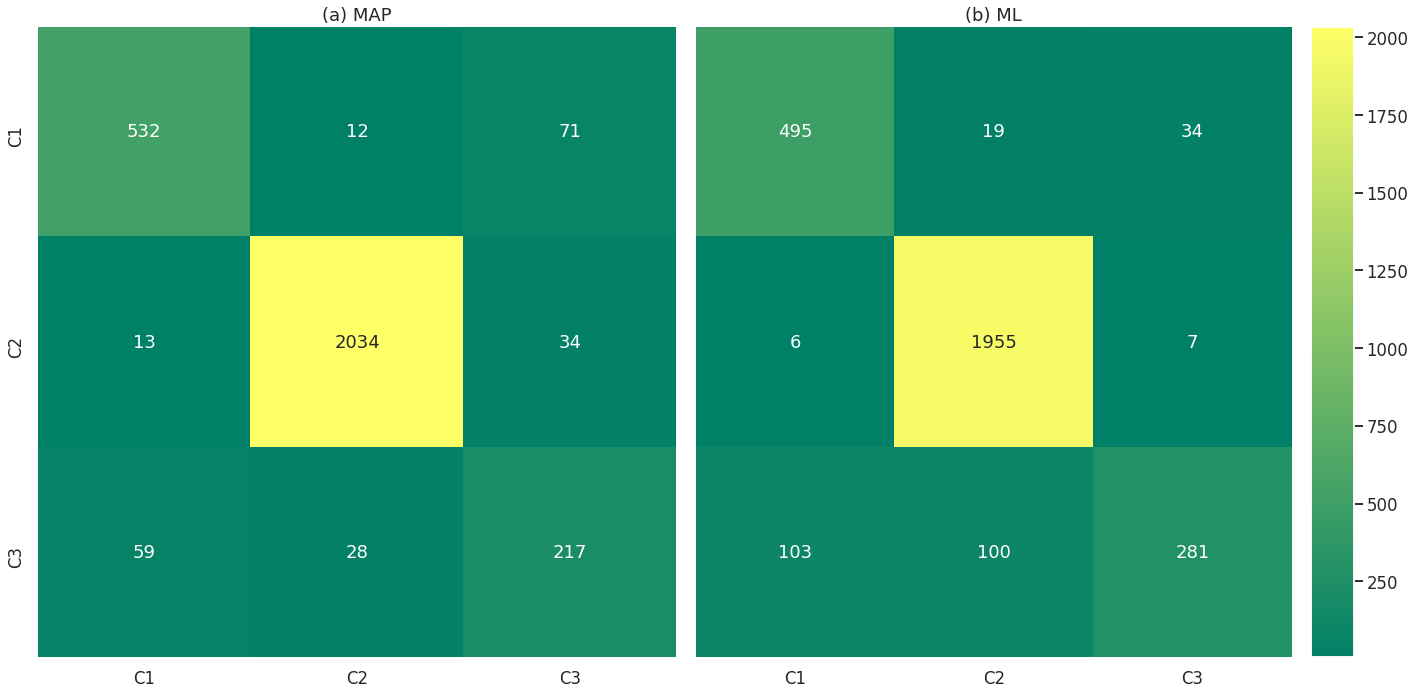

In [ ]:
df_CM_MAP = pd.DataFrame(confusionMatrix_MAP, index = ["C1", "C2", "C3"],
                  columns = ["C1", "C2", "C3"])
df_CM_ML = pd.DataFrame(confusionMatrix_ML, index = ["C1", "C2", "C3"],
                  columns = ["C1", "C2", "C3"])

vmin = min(df_CM_MAP.values.min(), df_CM_ML.values.min())
vmax = max(df_CM_MAP.values.max(), df_CM_ML.values.max())

# fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[4,1,0.2]))

# sns.heatmap(df, annot=True, cbar=False, ax=axs[0], vmin=vmin)
# sns.heatmap(df2, annot=True, yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)



fig, ax = plt.subplots(nrows = 1, ncols = 3,
                       figsize = [20.0, 10.0],
                       gridspec_kw = dict(width_ratios = [3, 2.8, 0.2]))
ax[0] = sns.heatmap(df_CM_MAP, vmin = vmin, vmax = vmax, annot = True, fmt = 'g', cbar = False, cmap = "summer", ax = ax[0])
ax[0].set_title('(a) MAP', y = 0)
ax[1].set_title('(b) ML', y = -10)
ax[1] = sns.heatmap(df_CM_ML, vmin = vmin, vmax = vmax, yticklabels=False, annot = True, fmt = 'g', cbar = False, cmap = "summer", ax = ax[1])
ax[2] = fig.colorbar(ax[0].collections[0], cax=ax[2])
fig.tight_layout()

# Question 3

## a)

PCA whitening: http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

In [ ]:
# https://stackoverflow.com/a/53570674
#To read file
import gzip
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size)

#to use image:
# import matplotlib.pyplot as plt
# image = np.asarray(data[59000])
# plt.imshow(image)
# plt.show()
#reshape it into vector of num_images by 784 (1 number per row)
data2=data.reshape(num_images, 784) 
# data2.shape
# plt.imshow(data2[504,:].reshape(image_size,image_size))

#Obtaining the eigenvalues
# mnist_cov = np.cov(data2)
# from numpy import linalg as LA #Import numpy's linear algebra functions
# eigenvalues, eigenvectors = LA.eig(mnist_cov) #Obtain the eigenvalues and eigenvectors
# df_eigenvalues = pd.DataFrame(eigenvalues).transpose() #Make the eigenvalues a DataFrame for easier viewing
# df_eigenvalues #Show the DataFrame

#Standardize
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data2)
print(standardized_data.shape)
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print ("The shape of variance matrix = ", covar_matrix.shape)
from numpy import linalg as LA #Import numpy's linear algebra functions
eigenvalues, eigenvectors = LA.eig(covar_matrix) #Obtain the eigenvalues and eigenvectors





## b)

In [ ]:
#question b)
eigenvalues = sorted(eigenvalues, reverse=True)

# for i in range(eigenvalues.size):
#   print(eigenvalues[i])
eigenvals_tot = sum(eigenvalues)
explained_var = 0
i=0
while explained_var<=95:
  var_exp = eigenvalues[i] / eigenvals_tot * 100
  explained_var = explained_var + var_exp
  i=i+1

print(i)
eigenvalues[0:i]
# eigenvals_tot = sum(eigenvalues) #Obtain the total of the eigenvalues
# var_exp = [(i / eigenvals_tot) * 100 for i in sorted(eigenvalues, reverse=True)] #Obtain the 'variance each component explains' 
# cum_var_exp = np.cumsum(var_exp)
# cum_var_exp